In [1]:
import gtfparse
from gtfparse import read_gtf
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import random
from matplotlib import pyplot as plt
import random
import math

In [49]:
df = read_gtf("trial.gtf")

NameError: name 'read_gtf' is not defined

In [3]:
df.head(20)

,seqname,source,feature,start,end,score,strand,frame,gene_id,transcript_id
0,chr1,hg19_wgEncodeGencodeBasicV19,exon,66999066,66999090,0.0,+,0,ENST00000237247.6,ENST00000237247.6
1,chr1,hg19_wgEncodeGencodeBasicV19,start_codon,67000042,67000044,0.0,+,0,ENST00000237247.6,ENST00000237247.6
2,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67000042,67000051,0.0,+,0,ENST00000237247.6,ENST00000237247.6
3,chr1,hg19_wgEncodeGencodeBasicV19,exon,66999929,67000051,0.0,+,0,ENST00000237247.6,ENST00000237247.6
4,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67091530,67091593,0.0,+,2,ENST00000237247.6,ENST00000237247.6
5,chr1,hg19_wgEncodeGencodeBasicV19,exon,67091530,67091593,0.0,+,0,ENST00000237247.6,ENST00000237247.6
6,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67098753,67098777,0.0,+,1,ENST00000237247.6,ENST00000237247.6
7,chr1,hg19_wgEncodeGencodeBasicV19,exon,67098753,67098777,0.0,+,0,ENST00000237247.6,ENST00000237247.6
8,chr1,hg19_wgEncodeGencodeBasicV19,CDS,67099763,67099846,0.0,+,0,ENST00000237247.6,ENST00000237247.6
9,chr1,hg19_wgEncodeGencodeBasicV19,exon,67099763,67099846,0.0,+,0,ENST00000237247.6,ENST00000237247.6


In [3]:
exons = df[df["feature"] == "exon"]
strand_col = exons["strand"]

In [4]:
num_exons = exons.shape[0]

In [5]:
#Defining the donor and acceptor sites for the training and validation sets of data

exon_end = exons["end"]
exon_beginning = exons["start"]

acceptor_splice_sites = exon_end + 1
donor_splice_sites = exon_beginning - 1

In [63]:
chrom_number = exons.iloc[:, 0]
chrom_number

0                           chr1
3                           chr1
5                           chr1
7                           chr1
9                           chr1
11                          chr1
13                          chr1
15                          chr1
17                          chr1
19                          chr1
21                          chr1
23                          chr1
25                          chr1
27                          chr1
29                          chr1
31                          chr1
33                          chr1
35                          chr1
37                          chr1
39                          chr1
41                          chr1
43                          chr1
45                          chr1
47                          chr1
49                          chr1
51                          chr1
54                          chr1
55                          chr1
58                          chr1
60                          chr1
          

In [8]:
#Generate start and end positions for training/testing set intervals

num_flanking_nucleotides = 1000

start_position = []
end_position = []

for a, b in zip(acceptor_splice_sites, donor_splice_sites):
    start_position.append(a-1000)
    end_position.append(a+1000)
    start_position.append(b-1000)
    end_position.append(b+1000)

In [15]:
#Display Intervals

for i in range(len(exons)):
    print (str(start_position[i]) + "," + str(end_position[i]))

66998091,67000091
66998065,67000065
66999052,67001052
66998928,67000928
67090594,67092594
67090529,67092529
67097778,67099778
67097752,67099752
67098847,67100847
67098762,67100762
67104517,67106517
67104459,67106459
67107548,67109548
67107492,67109492
67108403,67110403
67108226,67110226
67125208,67127208
67125195,67127195
67132225,67134225
67132212,67134212
67135703,67137703
67135677,67137677
67136679,67138679
67136626,67138626
67138050,67140050
67137963,67139963
67141780,67143780
67141686,67143686
67144436,67146436
67144360,67146360
67147053,67149053
67146551,67148551
67148871,67150871
67148789,67150789
67153959,67155959
67153830,67155830
67155000,67157000
67154872,67156872
67160177,67162177
67160116,67162116
67184089,67186089
67183976,67185976
67194103,67196103
67193946,67195946
67198564,67200564
67198430,67200430
67204221,67206221
67204017,67206017
67205406,67207406
67205340,67207340
67206120,67208120
67205954,67207954
67209058,67211058
67207755,67209755
66998356,67000356
66998274,6

3347529,3349529
3354184,3356184
3349297,3351297
2984861,2986861
2984741,2986741
3102039,3104039
3101688,3103688
3159702,3161702
3159650,3161650
3300851,3302851
3300715,3302715
3310059,3312059
3310055,3312055
3312158,3314158
3312054,3314054
3318563,3320563
3318354,3320354
3320451,3322451
3320302,3322302
3321213,3323213
3321058,3323058
3328365,3330365
3326947,3328947
3330212,3332212
3330126,3332126
3333562,3335562
3333391,3335391
3334309,3336309
3334230,3336230
3341315,3343315
3341144,3343144
3341790,3343790
3341614,3343614
3346673,3348673
3346435,3348435
3347705,3349705
3347529,3349529
3354184,3356184
3349240,3351240
2984861,2986861
2984741,2986741
3102039,3104039
3101688,3103688
3159702,3161702
3159650,3161650
3300851,3302851
3300715,3302715
3312158,3314158
3312054,3314054
3318563,3320563
3318354,3320354
3320451,3322451
3320302,3322302
3321213,3323213
3321058,3323058
3328365,3330365
3326947,3328947
3330212,3332212
3330126,3332126
3333562,3335562
3333391,3335391
3334309,3336309
3334230,

29318841,29320841
29322832,29324832
29322726,29324726
29337420,29339420
29337376,29339376
29341280,29343280
29341203,29343203
29343955,29345955
29343735,29345735
29356000,29358000
29355911,29357911
29358758,29360758
29358604,29360604
29361436,29363436
29361337,29363337
29364939,29366939
29364765,29366765
29378825,29380825
29378615,29380615
29385997,29387997
29385933,29387933
29390671,29392671
29390493,29392493
29423448,29425448
29423318,29425318
29437961,29439961
29437879,29439879
29441316,29443316
29441210,29443210
29442627,29444627
29442330,29444330
29212723,29214723
29212683,29214683
29313418,29315418
29312942,29314942
29319055,29321055
29318841,29320841
29337420,29339420
29337376,29339376
29341280,29343280
29341203,29343203
29343955,29345955
29343735,29345735
29356000,29358000
29355911,29357911
29358758,29360758
29358604,29360604
29361436,29363436
29361337,29363337
29364939,29366939
29364765,29366765
29378825,29380825
29378615,29380615
29390671,29392671
29390493,29392493
29423448,2

39805390,39807390
39805173,39807173
39805626,39807626
39805475,39807475
39811883,39813883
39811648,39813648
39814300,39816300
39814149,39816149
39815691,39817691
39815456,39817456
39817904,39819904
39817678,39819678
39822566,39824566
39822046,39824046
39823546,39825546
39823368,39825368
39823937,39825937
39823812,39825812
39825674,39827674
39825464,39827464
39826350,39828350
39826031,39828031
39832987,39834987
39832819,39834819
39834859,39836859
39834701,39836701
39837269,39839269
39837150,39839150
39843196,39845196
39843132,39845132
39844117,39846117
39843874,39845874
39845046,39847046
39844915,39846915
39846825,39848825
39846624,39848624
39850602,39852602
39850105,39852105
39853331,39855331
39851858,39853858
39887208,39889208
39887045,39889045
39887573,39889573
39887401,39889401
39888867,39890867
39888699,39890699
39892287,39894287
39892126,39894126
39892960,39894960
39892632,39894632
39893999,39895999
39893913,39895913
39894741,39896741
39894498,39896498
39895581,39897581
39895373,3

39893999,39895999
39893913,39895913
39894741,39896741
39894498,39896498
39895581,39897581
39895373,39897373
39897327,39899327
39897206,39899206
39897828,39899828
39897719,39899719
39899305,39901305
39899085,39901085
39900434,39902434
39900229,39902229
39902681,39904681
39902448,39904448
39904173,39906173
39903945,39905945
39905798,39907798
39905674,39907674
39905998,39907998
39905895,39907895
39906726,39908726
39906623,39908623
39906993,39908993
39906818,39908818
39907240,39909240
39907083,39909083
39907584,39909584
39907385,39909385
39908247,39910247
39908117,39910117
39909508,39911508
39909333,39911333
39912260,39914260
39912103,39914103
39912571,39914571
39912363,39914363
39912825,39914825
39912704,39914704
39913436,39915436
39913265,39915265
39915884,39917884
39915723,39917723
39917023,39919023
39916827,39918827
39917485,39919485
39917355,39919355
39918523,39920523
39918378,39920378
39919770,39921770
39919580,39921580
39923163,39925163
39923041,39925041
39923922,39925922
39923757,3

55562270,55564270
55562758,55564758
55562615,55564615
55563232,55565232
55563148,55565148
55564543,55566543
55564443,55566443
55565638,55567638
55565511,55567511
55566377,55568377
55566256,55568256
55568694,55570694
55568548,55570548
55570937,55572937
55570818,55572818
55572104,55574104
55571911,55573911
55574920,55576920
55574857,55576857
55585430,55587430
55585268,55587268
55586180,55588180
55586108,55588108
55588276,55590276
55588119,55590119
55589302,55591302
55589141,55591141
55590222,55592222
55589992,55591992
55590432,55592432
55590335,55592335
55594248,55596248
55594149,55596149
55597374,55599374
55597217,55599217
55598837,55600837
55598742,55600742
55599087,55601087
55599000,55601000
55602362,55604362
55602187,55604187
55602578,55604578
55602478,55604478
55603392,55605392
55603280,55605280
55603684,55605684
55603616,55605616
55606405,55608405
55606288,55608288
55607469,55609469
55607414,55609414
55607793,55609793
55607651,55609651
55608877,55610877
55608799,55610799
55610783,5

66086035,66088035
66087665,66089665
66087588,66089588
66095106,66097106
66094884,66096884
65885424,65887424
65885334,65887334
65890062,65892062
65889985,65891985
66030289,66032289
66030228,66032228
66035486,66037486
66035155,66037155
66037133,66039133
66037008,66039008
66057549,66059549
66057339,66059339
66061277,66063277
66061130,66063130
66063488,66065488
66063342,66065342
66066366,66068366
66066074,66068074
66066644,66068644
66066525,66068525
66069921,66071921
66069720,66071720
66073585,66075585
66073435,66075435
66074790,66076790
66074629,66076629
66074980,66076980
66074896,66076896
66080908,66082908
66080690,66082690
66082830,66084830
66082646,66084646
66084707,66086707
66084610,66086610
66086142,66088142
66086035,66088035
66087665,66089665
66087588,66089588
66100112,66102112
66097834,66099834
65885424,65887424
65885334,65887334
65890062,65892062
65889985,65891985
66030289,66032289
66030228,66032228
66035486,66037486
66035155,66037155
66037133,66039133
66037008,66039008
66057549,6

87028453,87030453
87028343,87030343
87030135,87032135
87029956,87031956
87030704,87032704
87030484,87032484
87032335,87034335
87032106,87034106
87035938,87037938
87035759,87037759
87037404,87039404
87037296,87039296
87039439,87041439
87039222,87041222
87040283,87042283
87040014,87042014
87042756,87044756
87042584,87044584
87044271,87046271
87044036,87046036
87045438,87047438
87044624,87046624
87011962,87013962
87011925,87013925
87024756,87026756
87024614,87026614
87025042,87027042
87024893,87026893
87028453,87030453
87028343,87030343
87030704,87032704
87030484,87032484
87032335,87034335
87032106,87034106
87035938,87037938
87035759,87037759
87037842,87039842
87037296,87039296
89005343,89007343
89002195,89004195
89021732,89023732
89021586,89023586
89034879,89036879
89034669,89036669
89149888,89151888
89149846,89151846
90097882,90099882
90097630,90099630
90151171,90153171
90151028,90153028
90184093,90186093
90177267,90179267
90097882,90099882
90097630,90099630
90151171,90153171
90151028,9

114252098,114254098
114251875,114253875
114253458,114255458
114253367,114255367
114253736,114255736
114253561,114255561
114255061,114257061
114254900,114256900
114266516,114268516
114266380,114268380
114268197,114270197
114268039,114270039
114279891,114281891
114279731,114281731
114280422,114282422
114280351,114282351
114299378,114301378
114299320,114301320
114300471,114302471
114300280,114302280
114301099,114303099
114300644,114302644
114247785,114249785
114247695,114249695
114248345,114250345
114248215,114250215
114252098,114254098
114251875,114253875
114253458,114255458
114253367,114255367
114253736,114255736
114253561,114255561
114266516,114268516
114266380,114268380
114268197,114270197
114268039,114270039
114279891,114281891
114279731,114281731
114280422,114282422
114280351,114282351
114299378,114301378
114299320,114301320
114300504,114302504
114300280,114302280
118471406,118473406
118471390,118473390
118475114,118477114
118474910,118476910
118476306,118478306
118476095,118478095


178410809,178412809
178413798,178415798
178413652,178415652
178419851,178421851
178419705,178421705
178420788,178422788
178420550,178422550
178422784,178424784
178422581,178424581
178425035,178427035
178424834,178426834
178426680,178428680
178425817,178427817
178432548,178434548
178432412,178434412
178434258,178436258
178434054,178436054
178435557,178437557
178435468,178437468
178447645,178449645
178441209,178443209
178062830,178064830
178062275,178064275
178251827,178253827
178251698,178253698
178268254,178270254
178268126,178270126
178358342,178360342
178358234,178360234
178388756,178390756
178388645,178390645
178407711,178409711
178407556,178409556
178409783,178411783
178409683,178411683
178411365,178413365
178410809,178412809
178413798,178415798
178413652,178415652
178419851,178421851
178419705,178421705
178420788,178422788
178420550,178422550
178422784,178424784
178422581,178424581
178425035,178427035
178424855,178426855
178426680,178428680
178425817,178427817
178432548,178434548


210685496,210687496
210760444,210762444
210760241,210762241
210796015,210798015
210795869,210797869
210848639,210850639
210846629,210848629
210501449,210503449
210501249,210503249
210535264,210537264
210535195,210537195
210559926,210561926
210559811,210561811
210573007,210575007
210572811,210574811
210577024,210579024
210576807,210578807
210590670,210592670
210590497,210592497
210637000,210639000
210636848,210638848
210685533,210687533
210685496,210687496
210760444,210762444
210760241,210762241
210796015,210798015
210795869,210797869
210848639,210850639
210846629,210848629
210501449,210503449
210501263,210503263
210559926,210561926
210559811,210561811
210573007,210575007
210572811,210574811
210577024,210579024
210576807,210578807
210590670,210592670
210590497,210592497
210637000,210639000
210636848,210638848
210685533,210687533
210685496,210687496
210760444,210762444
210760241,210762241
210796015,210798015
210795869,210797869
210846797,210848797
210846629,210848629
210501449,210503449


225332082,225334082
225332027,225334027
225333952,225335952
225333805,225335805
225338776,225340776
225338706,225340706
225339586,225341586
225339398,225341398
225340529,225342529
225340451,225342451
225346188,225348188
225346030,225348030
225354731,225356731
225354640,225356640
225372128,225374128
225371992,225373992
225379614,225381614
225379397,225381397
225390976,225392976
225390884,225392884
225392882,225394882
225392672,225394672
225393923,225395923
225393669,225395669
225417854,225419854
225417774,225419774
225427525,225429525
225427294,225429294
225437406,225439406
225437357,225439357
225439120,225441120
225439002,225441002
225444821,225446821
225444661,225446661
225445956,225447956
225445822,225447822
225450964,225452964
225450898,225452898
225452072,225454072
225451883,225453883
225453472,225455472
225453342,225455342
225457569,225459569
225457436,225459436
225458776,225460776
225458607,225460607
225459828,225461828
225459656,225461656
225476785,225478785
225476586,225478586


240965294,240967294
240965203,240967203
240968627,240970627
240968439,240970439
240974344,240976344
240974217,240976217
240976029,240978029
240975917,240977917
240977078,240979078
240977015,240979015
240978716,240980716
240978616,240980616
240989473,240991473
240989397,240991397
241030969,241032969
241030886,241032886
241031153,241033153
241031075,241033075
241032420,241034420
241032354,241034354
241093069,241095069
241093016,241095016
241099007,241101007
241098899,241100899
241145430,241147430
241145378,241147378
241261063,241263063
241260965,241262965
241518077,241520077
241517998,241519998
245317790,245319790
245317286,245319286
245318986,245320986
245318583,245320583
245529670,245531670
245529135,245531135
245582048,245584048
245581880,245583880
245703253,245705253
245703068,245705068
245765086,245767086
245764878,245766878
245770047,245772047
245769952,245771952
245771831,245773831
245771567,245773567
245774279,245776279
245774094,245776094
245808583,245810583
245808422,245810422


6149448,6151448
6153546,6155546
6153459,6155459
6154504,6156504
6154382,6156382
6154685,6156685
6154589,6156589
6155817,6157817
6155695,6157695
6156418,6158418
6156328,6158328
6159524,6161524
6157544,6159544
6093855,6095855
6093342,6095342
6099706,6101706
6099576,6101576
6100933,6102933
6100890,6102890
6131859,6133859
6131814,6133814
6132831,6134831
6132792,6134792
6141335,6143335
6141254,6143254
6144309,6146309
6144263,6146263
6146572,6148572
6146526,6148526
6148112,6150112
6148067,6150067
6149536,6151536
6149448,6151448
6153546,6155546
6153459,6155459
6154504,6156504
6154382,6156382
6154685,6156685
6154589,6156589
6155817,6157817
6155695,6157695
6156418,6158418
6156328,6158328
6160240,6162240
6157544,6159544
6105244,6107244
6104980,6106980
6110815,6112815
6110570,6112570
6131859,6133859
6131814,6133814
6132831,6134831
6132792,6134792
6141335,6143335
6141254,6143254
6144309,6146309
6144263,6146263
6146572,6148572
6146526,6148526
6148112,6150112
6148067,6150067
6149536,6151536
6149448,

10238952,10240952
10092753,10094753
10092653,10094653
10131273,10133273
10131085,10133085
10154655,10156655
10154518,10156518
10160254,10162254
10160165,10162165
10162151,10164151
10162005,10164005
10164803,10166803
10164573,10166573
10165642,10167642
10165254,10167254
10176659,10178659
10176516,10178516
10178672,10180672
10178570,10180570
10181135,10183135
10181019,10183019
10185936,10187936
10185851,10187851
10188507,10190507
10188449,10190449
10189675,10191675
10189557,10191557
10189872,10191872
10189772,10191772
10191541,10193541
10191426,10193426
10194245,10196245
10194045,10196045
10196264,10198264
10196124,10198124
10204098,10206098
10203997,10205997
10206149,10208149
10206020,10208020
10208341,10210341
10208241,10210241
10210620,10212620
10210383,10212383
10217541,10219541
10217413,10219413
10220345,10222345
10220199,10222199
10227329,10229329
10227193,10229193
10230388,10232388
10230195,10232195
10237877,10239877
10237701,10239701
10238621,10240621
10238473,10240473
10240298,1

12060894,12062894
12060825,12062825
12061161,12063161
12061038,12063038
12063176,12065176
12063048,12065048
12063671,12065671
12063565,12065565
12063985,12065985
12063881,12065881
12064989,12066989
12064767,12066767
12065751,12067751
12065594,12067594
12066307,12068307
12066109,12068109
12068784,12070784
12068648,12070648
12072566,12074566
12070552,12072552
12122719,12124719
12122433,12124433
12143609,12145609
12143520,12145520
12156275,12158275
12156157,12158157
12163589,12165589
12163435,12165435
12168714,12170714
12168622,12170622
12169262,12171262
12169097,12171097
12171072,12173072
12170954,12172954
12174787,12176787
12174633,12176633
12182435,12184435
12182340,12184340
12182885,12184885
12182771,12184771
12185110,12187110
12185007,12187007
12185294,12187294
12185239,12187239
12194671,12196671
12194644,12196644
12197494,12199494
12197285,12199285
12203265,12205265
12201343,12203343
12122719,12124719
12122526,12124526
12156275,12158275
12156157,12158157
12163589,12165589
12163435,1

16578590,16580590
16579227,16581227
16579129,16581129
16581317,16583317
16581205,16583205
16582255,16584255
16582100,16584100
16620413,16622413
16620277,16622277
16631415,16633415
16631297,16633297
16640931,16642931
16640663,16642663
16677950,16679950
16677749,16679749
16889682,16891682
16887813,16889813
16890414,16892414
16890301,16892301
16891301,16893301
16891127,16893127
16891955,16893955
16891902,16893902
16892847,16894847
16892673,16894673
16893526,16895526
16893473,16895473
16894732,16896732
16894567,16896567
16898689,16900689
16898636,16900636
16900188,16902188
16899981,16901981
16900725,16902725
16900651,16902651
16901977,16903977
16901761,16903761
16902915,16904915
16902811,16904811
16904898,16906898
16904687,16906687
16906452,16908452
16906239,16908239
16906988,16908988
16906914,16908914
16908254,16910254
16908038,16910038
16909192,16911192
16909088,16911088
16911194,16913194
16910983,16912983
16912757,16914757
16912544,16914544
16913293,16915293
16913219,16915219
16914559,1

19445673,19447673
19446929,19448929
19446682,19448682
19447507,19449507
19447427,19449427
19448555,19450555
19448326,19450326
19450185,19452185
19450034,19452034
19452150,19454150
19451939,19453939
19453234,19455234
19453116,19455116
19453813,19455813
19453704,19455704
19454569,19456569
19454471,19456471
19463676,19465676
19463500,19465500
19464715,19466715
19464576,19466576
19467019,19469019
19466840,19468840
19467272,19469272
19467140,19469140
19469586,19471586
19469473,19471473
19470402,19472402
19470279,19472279
19471428,19473428
19471286,19473286
19472495,19474495
19472319,19474319
19473622,19475622
19473486,19475486
19474121,19476121
19474056,19476056
19475290,19477290
19475256,19477256
19476288,19478288
19476070,19478070
19477354,19479354
19477136,19479136
19477971,19479971
19477806,19479806
19478997,19480997
19478794,19480794
19479434,19481434
19479261,19481261
19480570,19482570
19480411,19482411
19481163,19483163
19480934,19482934
19481918,19483918
19481764,19483764
19482420,1

21294966,21296966
21298593,21300593
21298494,21300494
21305942,21307942
21305826,21307826
21306721,21308721
21306540,21308540
21328302,21330302
21328205,21330205
21376488,21378488
21376358,21378358
21132994,21134994
21131975,21133975
21136378,21138378
21136230,21138230
21138733,21140733
21138650,21140650
21143032,21145032
21142884,21144884
21150692,21152692
21150592,21152592
21153192,21155192
21153109,21155109
21154766,21156766
21154639,21156639
21166522,21168522
21166348,21168348
21175024,21177024
21174907,21176907
21176972,21178972
21176750,21178750
21179171,21181171
21179052,21181052
21180565,21182565
21180470,21182470
21182991,21184991
21182895,21184895
21186011,21188011
21185877,21187877
21187826,21189826
21187720,21189720
21190206,21192206
21189968,21191968
21190756,21192756
21190608,21192608
21205014,21207014
21204815,21206815
21211865,21213865
21211693,21213693
21219130,21221130
21219009,21221009
21220995,21222995
21220860,21222860
21225437,21227437
21225189,21227189
21230465,2

22181169,22183169
22181015,22183015
22181406,22183406
22181279,22183279
22182689,22184689
22182507,22184507
22182879,22184879
22182777,22184777
22185170,22187170
22185058,22187058
22185496,22187496
22185327,22187327
22185729,22187729
22185669,22187669
22187337,22189337
22187249,22189249
22187609,22189609
22187480,22189480
22189707,22191707
22189592,22191592
22190567,22192567
22190335,22192335
22190859,22192859
22190777,22192777
22191303,22193303
22191209,22193209
22197871,22199871
22197678,22199678
22198254,22200254
22198112,22200112
22198585,22200585
22198489,22200489
22198918,22200918
22198867,22200867
22199505,22201505
22199417,22201417
22200027,22202027
22199898,22201898
22200223,22202223
22200108,22202108
22200496,22202496
22200383,22202383
22201241,22203241
22201121,22203121
22201536,22203536
22201355,22203355
22201899,22203899
22201721,22203721
22202146,22204146
22202004,22204004
22203747,22205747
22203678,22205678
22203985,22205985
22203925,22205925
22204157,22206157
22204069,2

25711201,25713201
25714605,25716605
25714466,25716466
25716407,25718407
25716239,25718239
25717633,25719633
25717484,25719484
25728238,25730238
25728086,25730086
25734361,25736361
25734173,25736173
25746364,25748364
25746129,25748129
25688045,25690045
25687740,25689740
25696032,25698032
25695957,25697957
25700920,25702920
25700839,25702839
25711336,25713336
25711201,25713201
25714605,25716605
25714466,25716466
25728238,25730238
25728086,25730086
25734361,25736361
25734173,25736173
25746364,25748364
25746129,25748129
25688045,25690045
25687740,25689740
25696032,25698032
25695957,25697957
25700920,25702920
25700839,25702839
25716407,25718407
25716239,25718239
25717633,25719633
25717484,25719484
25728238,25730238
25728086,25730086
25734361,25736361
25734173,25736173
25746364,25748364
25746129,25748129
25688045,25690045
25687798,25689798
25696032,25698032
25695957,25697957
25711336,25713336
25711201,25713201
25714605,25716605
25714466,25716466
25728238,25730238
25728086,25730086
25734361,2

KeyboardInterrupt: 

In [64]:
intervals = pd.DataFrame(zip(start_position, end_position))
intervals

,0,1
0,66998091,67000091
1,66998065,67000065
2,66999052,67001052
3,66998928,67000928
4,67090594,67092594
5,67090529,67092529
6,67097778,67099778
7,67097752,67099752
8,67098847,67100847
9,67098762,67100762


In [65]:
interval_frame = pd.concat([intervals, chrom_number], axis=1, ignore_index=True)
interval_frame = interval_frame.drop(interval_frame.columns[2], axis="columns")
interval_frame

,0,1
0,66998091,67000091
1,66998065,67000065
2,66999052,67001052
3,66998928,67000928
4,67090594,67092594
5,67090529,67092529
6,67097778,67099778
7,67097752,67099752
8,67098847,67100847
9,67098762,67100762


In [12]:
#Duplicate chromosome number strings to account for odd-numbered indices

b=[]
for i in list(chrom_number):
    b.extend([i, i])

c=[]
for i in list(strand_col):
    c.extend([i, i])

d=pd.DataFrame(c)


In [14]:
extended_chrom_number = pd.DataFrame(b)
extranded_strand = pd.DataFrame(c)
interval_frame = pd.concat([interval_frame, extended_strand], axis=1, ignore_index=True)

In [15]:
final = pd.concat([interval_frame, extended_chrom_number], axis=1, ignore_index=True)
interval_dataframe = pd.concat([final, d], axis=1, ignore_index=True)
interval_dataframe


,0,1,2,3
0,66998091,67000091,chr1,+
1,66998065,67000065,chr1,+
2,66999052,67001052,chr1,+
3,66998928,67000928,chr1,+
4,67090594,67092594,chr1,+
5,67090529,67092529,chr1,+
6,67097778,67099778,chr1,+
7,67097752,67099752,chr1,+
8,67098847,67100847,chr1,+
9,67098762,67100762,chr1,+


In [16]:
interval_dataframe.columns
interval-dataframe = interval_dataframe.rename(columns={0: "START", 1 : "END", 2 : "CHROM", 3: "STRAND"})

In [ ]:
interval_dataframe["column4"]=""
interval_dataframe["column5"]=""
interval_dataframe

In [62]:
#Saving text file of intervals to upload to galaxy

fmt = ('%5u', '%5u', '%5s', '%5s', '%5s', '%5s')

np.savetxt(r'bed_file.txt', interval_dataframe , fmt=fmt, delimiter = '\t')

In [ ]:
#Function to create a list of intervals for the shifted dataset

shifted_intervals = []

for ind in ab.index: 
    for i in [-1, 1]:
        shifted_intervals.append((interval_frame['START'][ind]+i, interval_frame['END'][ind]+i, ab['CHROM'][ind], ab['STRAND'][ind]))

In [2]:
#Define function to read fasta files

def read_fasta(fp):
    name, seq = None, []
    for line in fp:
        line = line.rstrip()
        if line.startswith(">"):
            if name: yield (name, ''.join(seq))
            name, seq = line, []
        else:
            seq.append(line)
    if name: yield (name, ''.join(seq))


In [11]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop

In [22]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(2000, 4)))
model.add(Conv1D(filters=64, kernel_size=12))
model.add(Conv1D(filters=128, kernel_size=12))
model.add(Conv1D(filters=256, kernel_size=12))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1989, 32)          1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1978, 64)          24640     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1967, 128)         98432     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1956, 256)         393472    
_________________________________________________________________
flatten_1 (Flatten)          (None, 500736)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               128188672 
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [ ]:
model.save_weights("/Users/mukundhmurthy/Desktop/original_weights.h5")

In [32]:
model.load_weights("/Users/mukundhmurthy/Desktop/original_weights.h5")

In [34]:
history = model.fit(np.stack(features), np.stack(labels), batch_size = 64, epochs=30, verbose=1, validation_split=0.25, callbacks = [es, mc])

Train on 75000 samples, validate on 25000 samples
Epoch 1/30
75000/75000 [==============================] - 8317s 111ms/sample - loss: 0.4976 - binary_accuracy: 0.7822 - val_loss: 0.4318 - val_binary_accuracy: 0.8120
Epoch 2/30
75000/75000 [==============================] - 8453s 113ms/sample - loss: 0.3163 - binary_accuracy: 0.8734 - val_loss: 0.4004 - val_binary_accuracy: 0.8342
Epoch 3/30
75000/75000 [==============================] - 6749s 90ms/sample - loss: 0.1240 - binary_accuracy: 0.9548 - val_loss: 0.5167 - val_binary_accuracy: 0.8339
Epoch 4/30
75000/75000 [==============================] - 6750s 90ms/sample - loss: 0.0515 - binary_accuracy: 0.9842 - val_loss: 0.7590 - val_binary_accuracy: 0.8417
Epoch 5/30
75000/75000 [==============================] - 6757s 90ms/sample - loss: 0.0365 - binary_accuracy: 0.9902 - val_loss: 0.7366 - val_binary_accuracy: 0.8472
Epoch 6/30
75000/75000 [==============================] - 6848s 91ms/sample - loss: 0.0302 - binary_accuracy: 0.9928 -

In [5]:
#Listing Callbacks

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('/Users/mukundhmurthy/Desktop/final_model.h5', monitor='val_loss', mode='min', save_best_only=True)

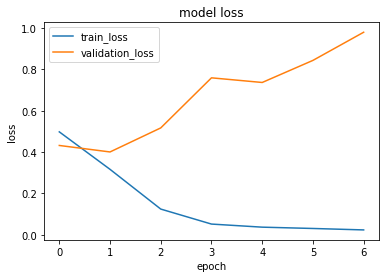

In [193]:
#Plotting Training and Validation losses

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'])
plt.show()

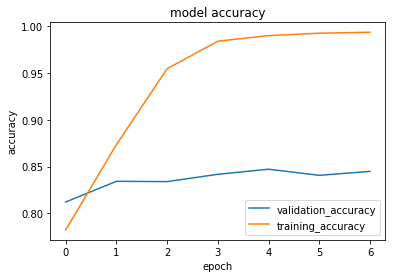

In [195]:
plt.figure()
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation_accuracy', 'training_accuracy'])
plt.show()



In [ ]:
print(history.history['val_loss'])
print(history.history['loss'])
print(history.history['binary_accuracy'])
print(history.history['val_binary_accuracy'])

In [30]:
#Run Predictions for Test Dataset
_, acc = model.evaluate(np.stack(features), np.stack(labels), verbose=1)

20000/20000 [==============================] - 447s 22ms/sample - loss: 1.3511 - binary_accuracy: 0.7315


In [59]:
#Upload fasta files created from genomic interval sequence extraction in Galaxy

train_seq = []

with open('train.fasta') as fp:
    for name, seq in read_fasta(fp):
        train_seq.append(seq)

shifted_seq = []

with open('random.fasta') as fp:
    for name, seq in read_fasta(fp):
        shifted_seq.append(seq)

In [37]:
##Defining a function that creates the input, the positive and negative sites along with a factor that determines how balanced the dataset is.##


def create_input_list(randm, trai, num_times_larger): 
    selected_from_train = []
    train= map(str.upper, trai)
    for i in range(len(randm)*num_times_larger):
        selected_from_train.append(train[random.randint(0, len(train)-1)])
    zeros = (np.zeros(len(randm))).reshape(-1, 1)
    ones = np.ones(len(randm)*num_times_larger).reshape(-1, 1)
    labels_list = np.vstack((zeros, ones))
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    one_hot_encoder = OneHotEncoder()
    integer_encoder = LabelEncoder()

    input_features = []
    
    for sequence in (selected_from_train + randm):
        integer_encoded = integer_encoder.fit_transform(list(sequence))
        one_hot_encoded = one_hot_encoder.fit_transform(np.array(integer_encoded).reshape(-1,1))
        input_features.append(one_hot_encoded.toarray())
        
    input_features = np.stack(input_features)
    
    labels = np.array(labels_list)
    input_labels = one_hot_encoder.fit_transform(labels).toarray()
    
    good_list = zip(input_features, input_labels)
    
    random.shuffle(good_list)
    
    input_features, input_labels = zip(*good_list)
    
    
    return (input_features, input_labels)
        

In [63]:
train_seq, shifted_seq = cleanse_datasets(train_seq, shifted_seq) 

In [62]:
#Function that cleanses the fasta sequences

def cleanse_datasets(train_sequence, shifted_sequence):
    
    shifted_sequence = map(str.upper, shifted_sequence)
    train_sequence = map(str.upper, train_sequence)
    
    train_sequence = list(dict.fromkeys(train_sequence))
    shifted_sequence = list(dict.fromkeys(shifted_sequence))

    for seq in train_sequence: 
        while len(set(seq))!=4:
            try: 
                train_sequence.remove(seq)
            except: 
                break
    for seq in shifted_sequence: 
        while len(set(seq))!=4:
            try: 
                shifted_sequence.remove(seq)
            except: 
                break
    return train_sequence, shifted_sequence
    

In [108]:
from pyfasta import Fasta

In [64]:
from random import sample

In [94]:
sampled_train = sample(train_seq, 15)
sampled_shifted = sample(shifted_seq, 15)

In [100]:
    sampled_train_features = []
    sampled_shifted_features = []
    
    i = 0
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    one_hot_encoder = OneHotEncoder()
    integer_encoder = LabelEncoder()
    for sequence in (sampled_train+sampled_shifted):
        integer_encoded = integer_encoder.fit_transform(list(sequence))
        one_hot_encoded = one_hot_encoder.fit_transform(np.array(integer_encoded).reshape(-1,1))
        if i<15:
            sampled_train_features.append(one_hot_encoded.toarray())
        else:
            sampled_shifted_features.append(one_hot_encoded.toarray())
        i+=1
    sampled_train_features = np.stack(sampled_train_features)
    sampled_shifted_features = np.stack(sampled_shifted_features)

In [103]:
len(sampled_shifted_features)

15

In [118]:
for feature in sampled_train_features: 
    feature = np.expand_dims(feature, axis=0)
    print feature.shape, feature.ndim
    grads = visualize_saliency(model, layeridx, filter_indices=1, seed_input=feature)
    

(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3
(1, 2000, 4) 3


In [120]:
for features in sampled_train_features: 
    print feature

[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]
[[[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [1. 0. 0

In [168]:
import tensorflow.keras.backend as K

def compute_salient_bases(model, x):
    input_tensors = [model.input]
    gradients = model.optimizer.get_gradients(model.output[0][1], model.input)
    compute_gradients = K.function(inputs = input_tensors, outputs = gradients)
    x_value = np.expand_dims(x, axis=0)
    gradients = compute_gradients([x_value])[0][0]
    print (gradients)
    sal = np.clip(np.sum(np.multiply(gradients,x), axis=1),a_min=0, a_max=None)
    return sal

[[-3.1847455e-11 -1.3772572e-10  5.1179944e-10  6.6217157e-11]
 [ 2.6244090e-10 -8.4550600e-10 -1.7908091e-09  6.7880929e-10]
 [ 5.6311573e-09  3.2034302e-09  6.7143369e-10  4.8025689e-10]
 ...
 [ 3.2019190e-09  2.0514618e-11  4.2242987e-09 -9.3625152e-09]
 [-3.0498897e-09 -2.9968217e-10  1.6634005e-09 -9.7121322e-10]
 [ 4.7359239e-10 -1.1890828e-09 -4.0731141e-10  4.8373083e-10]]
[[ 3.4352590e-05 -1.0255091e-05 -7.2833600e-06  5.2880114e-05]
 [ 2.1465206e-05 -8.0738646e-05 -7.0746799e-05 -1.8582901e-05]
 [ 6.2001825e-05 -4.2839067e-05  6.3757696e-05  5.4124430e-05]
 ...
 [-6.1933468e-05  1.2354649e-05  5.6623201e-05  6.6970351e-05]
 [ 4.3633230e-05  7.8495495e-06  2.1958309e-05  7.9274760e-06]
 [ 2.3680779e-05 -3.3713972e-05 -2.2695160e-05  1.7646491e-05]]
[[ 2.54512089e-14  5.68089107e-14 -5.65241755e-14  2.70614084e-14]
 [-7.59275591e-15 -1.42072809e-13 -1.03131980e-13  8.02049196e-14]
 [ 4.51997841e-13 -6.41344752e-14  2.15269412e-13  2.19601084e-13]
 ...
 [ 3.36816024e-13  1.55908

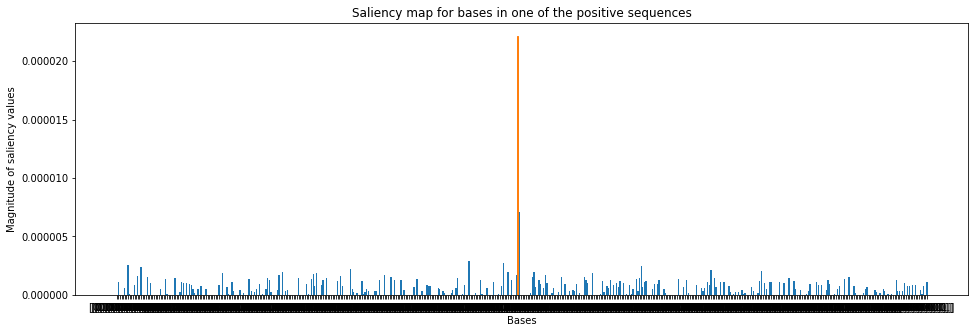

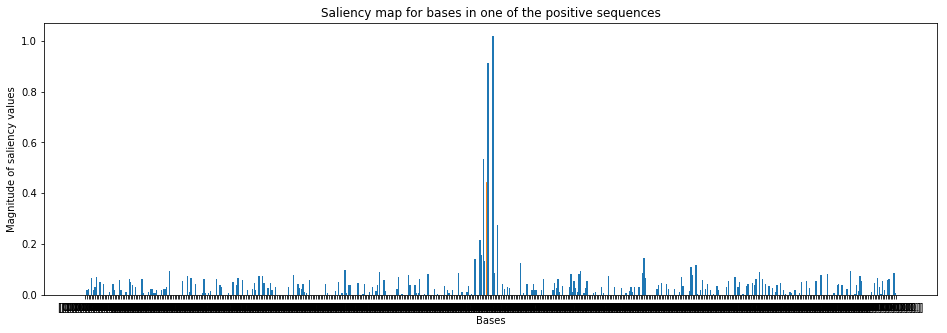

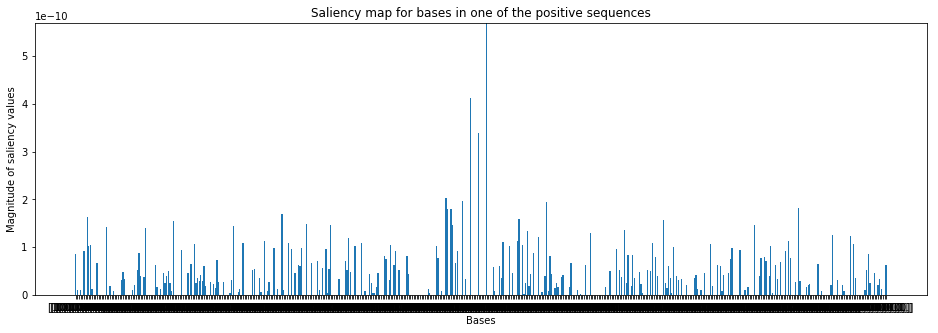

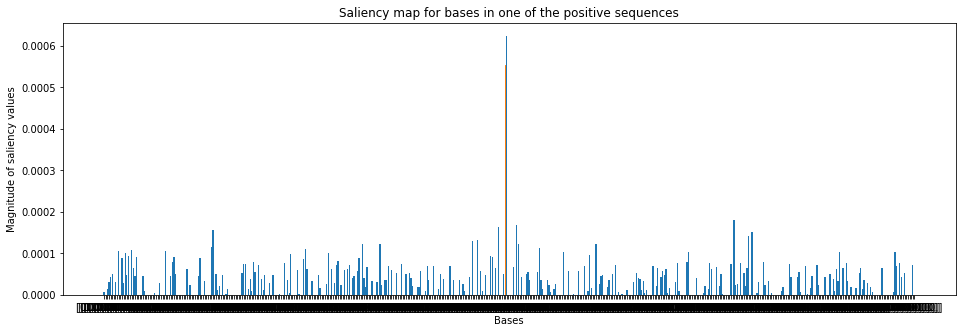

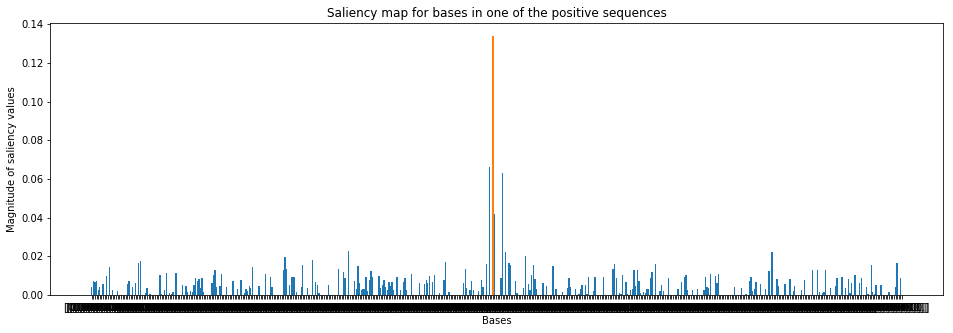

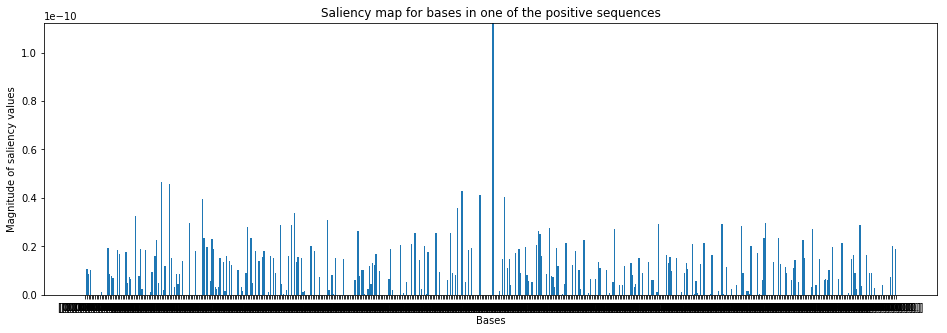

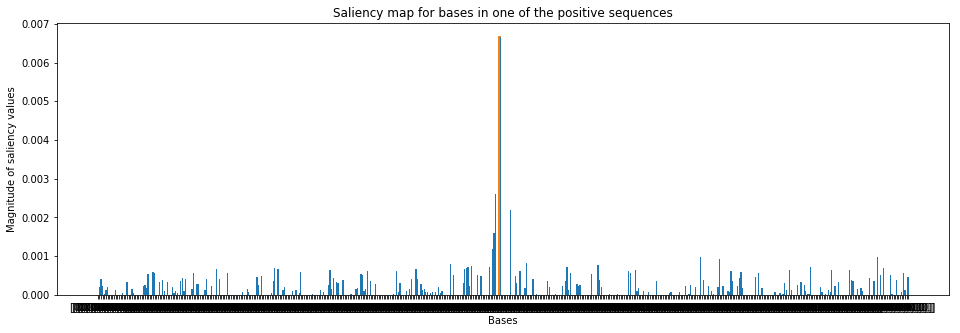

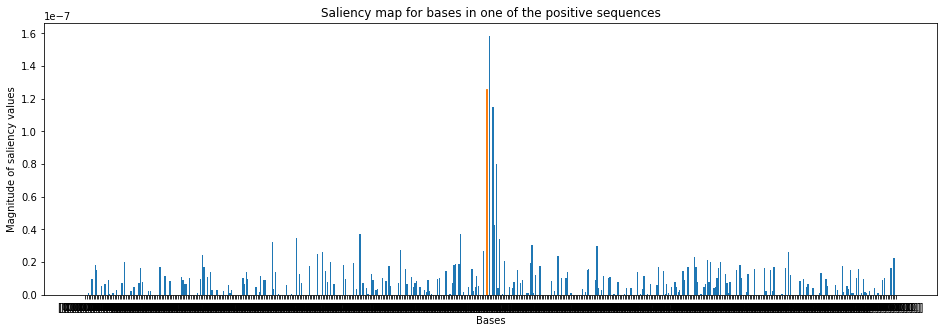

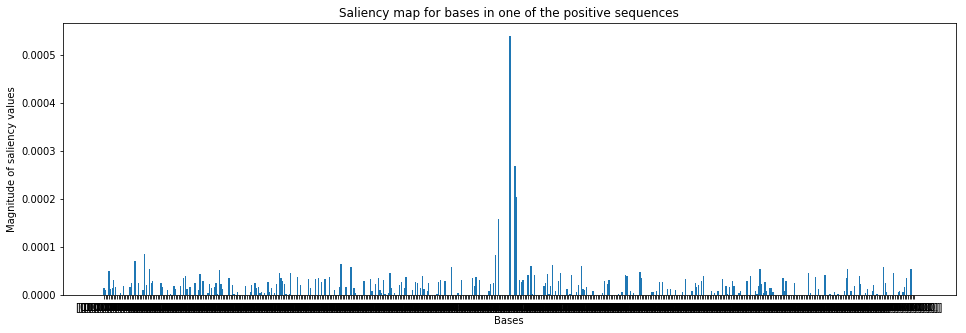

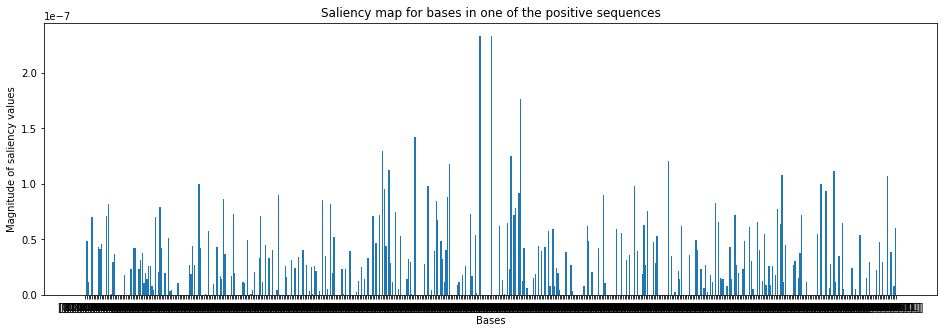

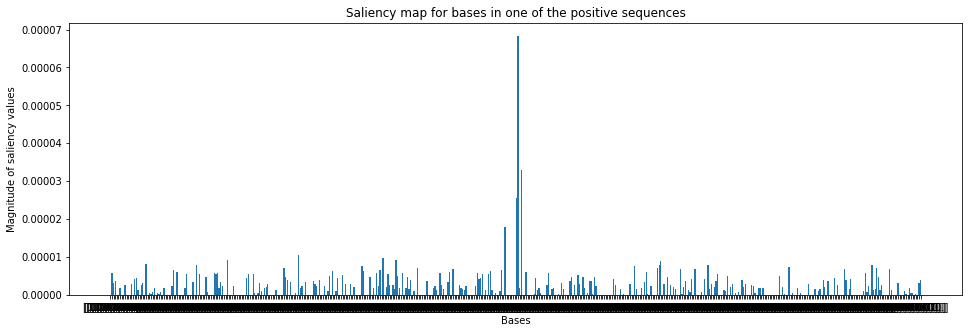

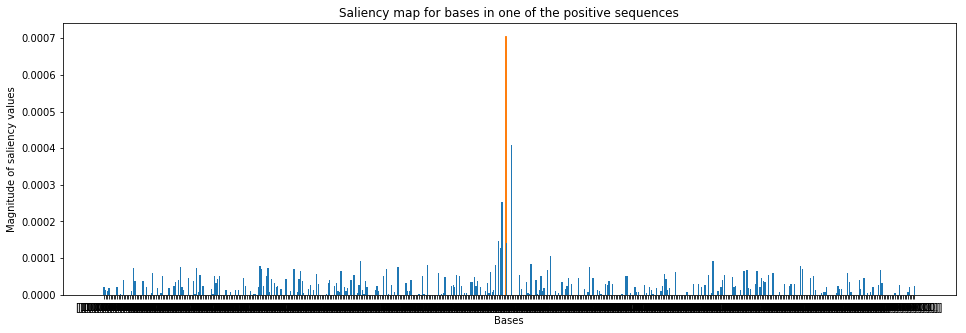

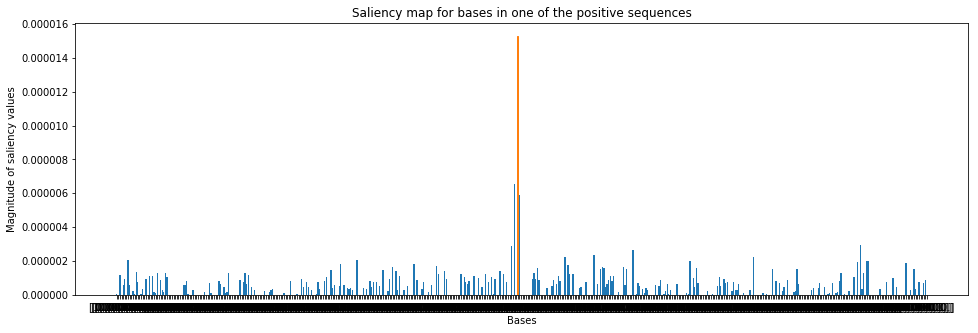

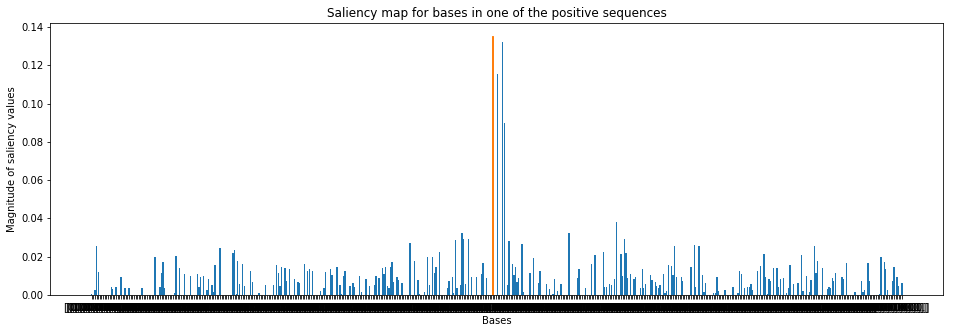

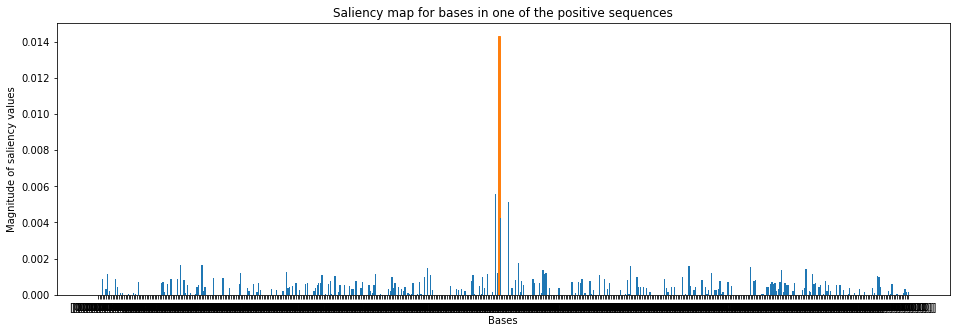

In [187]:
 # Visualizing saliency gradients for 15 randomly selected examples from training set

for k, sequence in enumerate(sampled_train_features):
    
    sal = compute_salient_bases(model, sampled_train_features[k])

    start_index = 750

    ending_index = 1250

    color_start = 247

    color_end = 248

    plt.figure(figsize=[16,5])
    barlist = plt.bar(np.arange(500), sal[start_index:ending_index])
    [barlist[i].set_color('C1') for i in range(color_start, color_end)]  # Change the coloring here if you change the sequence index.
    plt.xlabel('Bases')
    plt.ylabel('Magnitude of saliency values')
    plt.xticks(np.arange(500), list(sampled_train_features[k][start_index:ending_index] ));
    plt.title('Saliency map for bases in one of the positive sequences');

In [191]:
#saliency base indices for most important nucleotides

important_nucleotide

[997,
 1001,
 1003,
 998,
 997,
 1001,
 997,
 999,
 1000,
 1000,
 1001,
 997,
 997,
 997,
 997]